<a href="https://colab.research.google.com/github/asadyousuf-dare/Thesis-work/blob/main/ANN_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.metrics import r2_score, make_scorer
from sklearn.feature_selection import *
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score , classification_report, mean_squared_error, r2_score

import numpy as np
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from numpy.random import seed
seed(42)
import tensorflow
tensorflow.random.set_seed(42)
from tensorflow.keras.layers import Embedding
from IPython.display import clear_output



%config InlineBackend.figure_format = 'retina'



plt.rcParams['figure.figsize']=[14,10]
import seaborn as sns

In [4]:
!#pip install lrcurve

In [6]:
df = pd.read_csv('/content/training.csv')

In [7]:
df

,fc20,fy20,cover,depth,area,MR
0,25.96875,255.025,0.02903,0.28332,0.000181,11689.63659
1,16.93375,100.675,0.06461,0.24388,0.000520,9303.37660
2,32.92375,918.775,0.02899,0.18692,0.000251,35656.31202
3,23.59625,537.175,0.05823,0.14756,0.000319,14677.00345
4,63.76625,506.125,0.05349,0.20852,0.000223,17429.70740
...,...,...,...,...,...,...
1995,45.04625,326.575,0.06181,0.26540,0.000534,35190.35028
1996,51.41625,340.525,0.05461,0.29724,0.000349,28731.34144
1997,73.61375,487.225,0.03665,0.27276,0.000134,15422.04741
1998,71.20875,660.925,0.04467,0.18876,0.000391,36791.43248


In [8]:
df=df.dropna()

In [9]:
df.columns

Index(['fc20', 'fy20', 'cover', 'depth', 'area', 'MR'], dtype='object')

In [10]:
# Separate Target Variable and Predictor Variables
TargetVariable=['MR']
Predictors=['fc20', 'fy20', 'cover', 'depth', 'area' ]

X=df[Predictors].values
y=df[TargetVariable].values
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()
 
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)
 
# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)
 
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
len(X_test)

400

In [13]:

# Initialising the ANN
model = Sequential()
#model.add(Dropout(0.1, input_shape=(6,)))


# Adding the input layer and the first hidden layer
model.add(Dense(5, activation = 'relu',input_dim = 5))

model.add(Dense(5, activation = 'relu'))

# Adding the output layer

model.add(Dense(units = 1,activation='linear'))

#model.add(Dense(1))
# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['mean_squared_error'])

# Fitting the ANN to the Training set
history=model.fit(X_train, y_train, batch_size = 32, epochs = 100,
                  validation_data=(X_test, y_test),
                  # validation_freq=10,
                   validation_split=0.2, verbose=0,
                  
                 
                               )



In [15]:
history.history

{'loss': [1.0441265106201172,
  0.9300681948661804,
  0.8526576161384583,
  0.7737160325050354,
  0.6929596662521362,
  0.604804515838623,
  0.4927986264228821,
  0.380831241607666,
  0.28480064868927,
  0.2111034393310547,
  0.15466004610061646,
  0.11333606392145157,
  0.08610053360462189,
  0.06692557036876678,
  0.05497657135128975,
  0.04671357572078705,
  0.04112180322408676,
  0.03676431253552437,
  0.033821072429418564,
  0.03136255964636803,
  0.02943209372460842,
  0.027861203998327255,
  0.02659558318555355,
  0.025355691090226173,
  0.024308813735842705,
  0.02326955273747444,
  0.02267656847834587,
  0.021729398518800735,
  0.020959798246622086,
  0.020304163917899132,
  0.019794058054685593,
  0.019190939143300056,
  0.018513742834329605,
  0.017968731001019478,
  0.017325539141893387,
  0.016784969717264175,
  0.016319384798407555,
  0.015915488824248314,
  0.015579646453261375,
  0.015144845470786095,
  0.014842318370938301,
  0.014366962015628815,
  0.01415267400443554

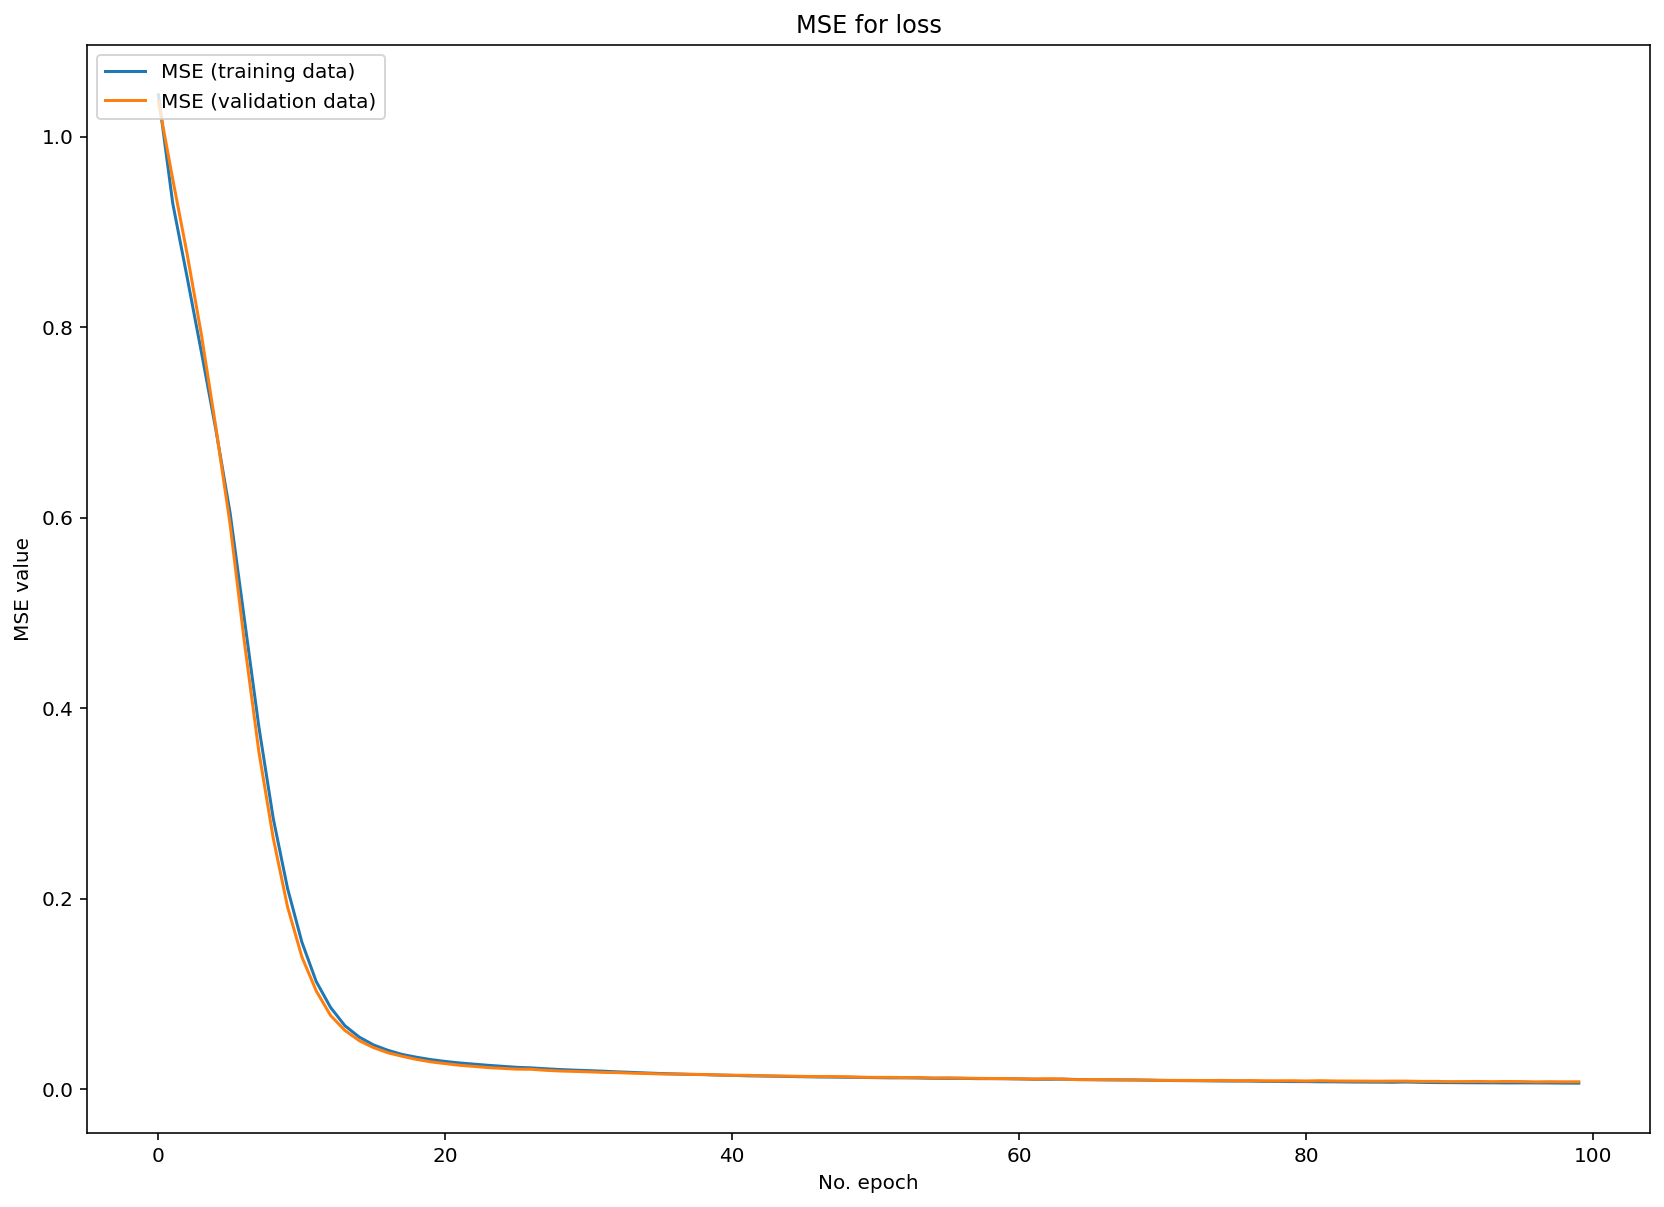

In [32]:
# Plot history: MSE
plt.plot(history.history['loss'], label='MSE (training data)')
plt.plot(history.history['val_loss'], label='MSE (validation data)')
plt.title('MSE for loss')
plt.ylabel('MSE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

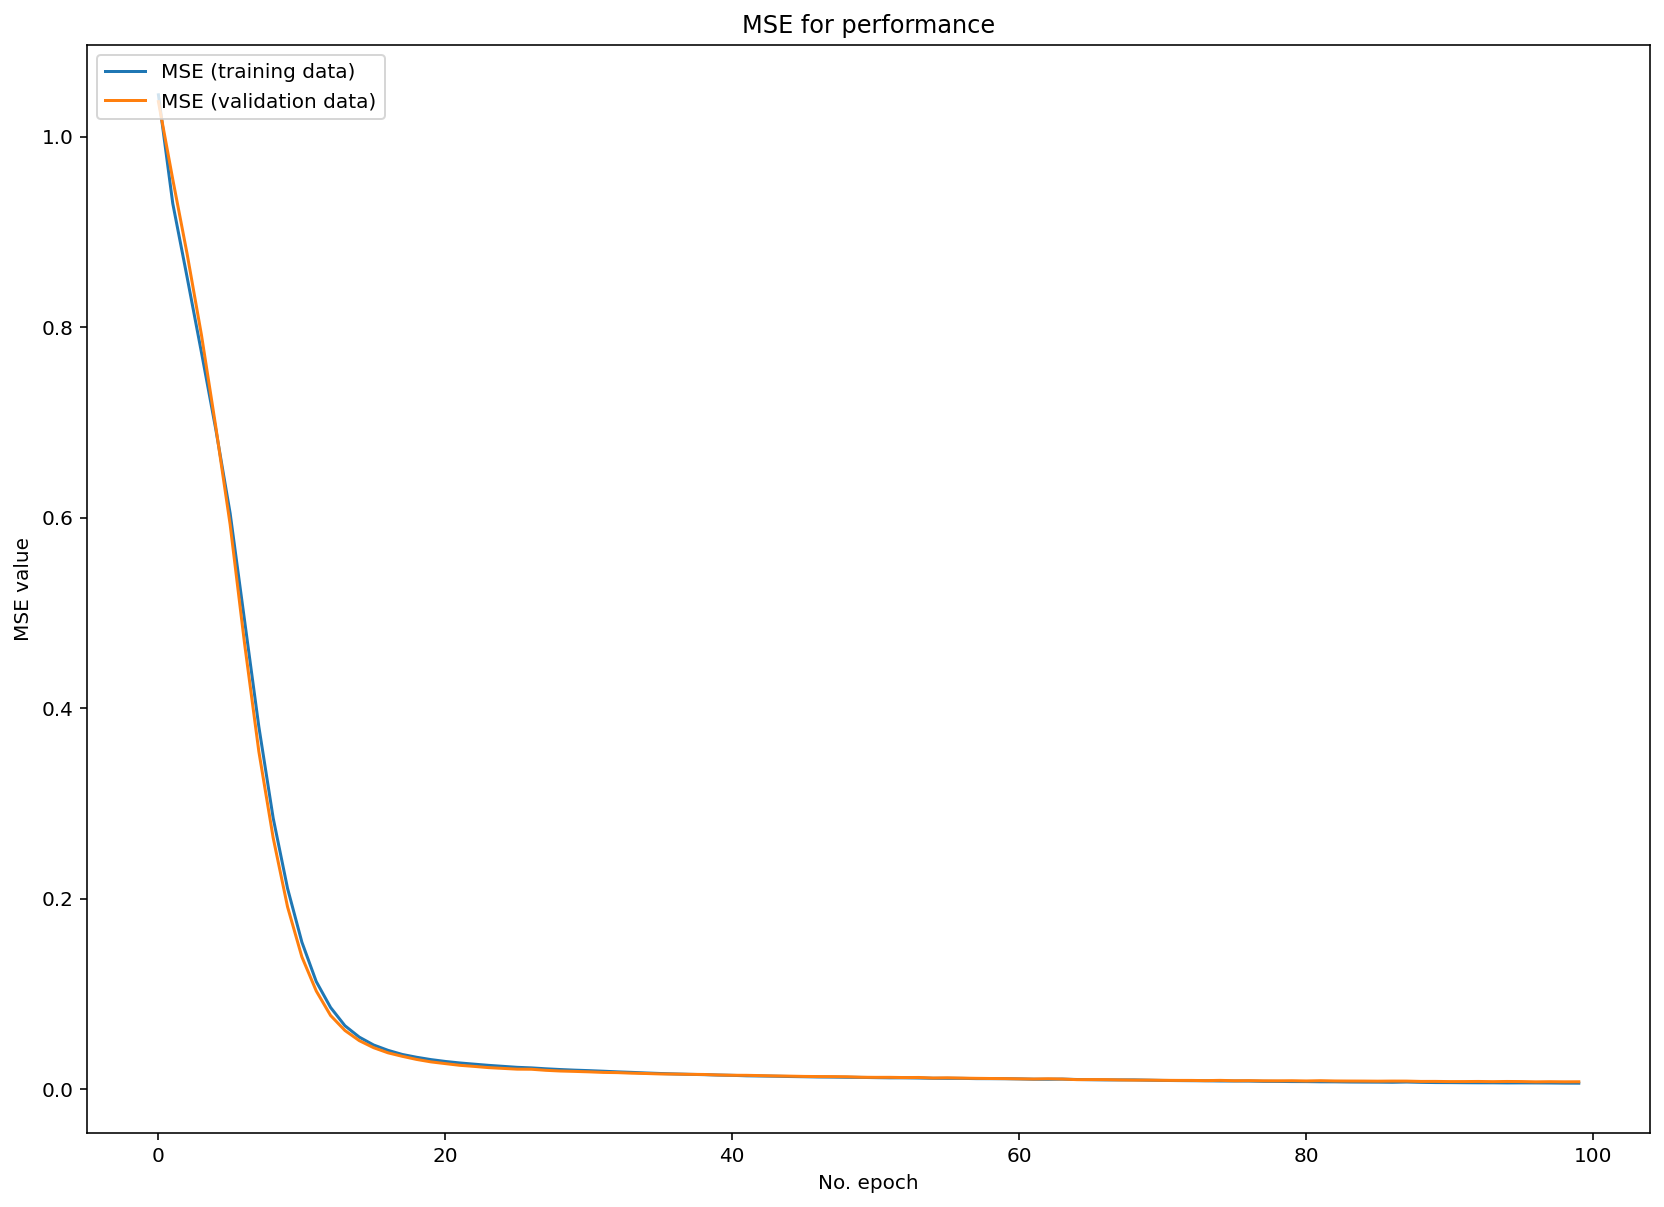

In [33]:
# Plot history: MSE
plt.plot(history.history['mean_squared_error'], label='MSE (training data)')
plt.plot(history.history['val_mean_squared_error'], label='MSE (validation data)')
plt.title('MSE for performance')
plt.ylabel('MSE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [20]:
pd.DataFrame(history.history)

,loss,mean_squared_error,val_loss,val_mean_squared_error
0,1.044127,1.044127,1.036972,1.036972
1,0.930068,0.930068,0.955390,0.955390
2,0.852658,0.852658,0.877171,0.877171
3,0.773716,0.773716,0.792022,0.792022
4,0.692960,0.692960,0.695481,0.695481
...,...,...,...,...
95,0.006927,0.006927,0.008315,0.008315
96,0.006880,0.006880,0.008022,0.008022
97,0.006811,0.006811,0.008179,0.008179
98,0.006665,0.006665,0.008052,0.008052


# sample WISE learning curve

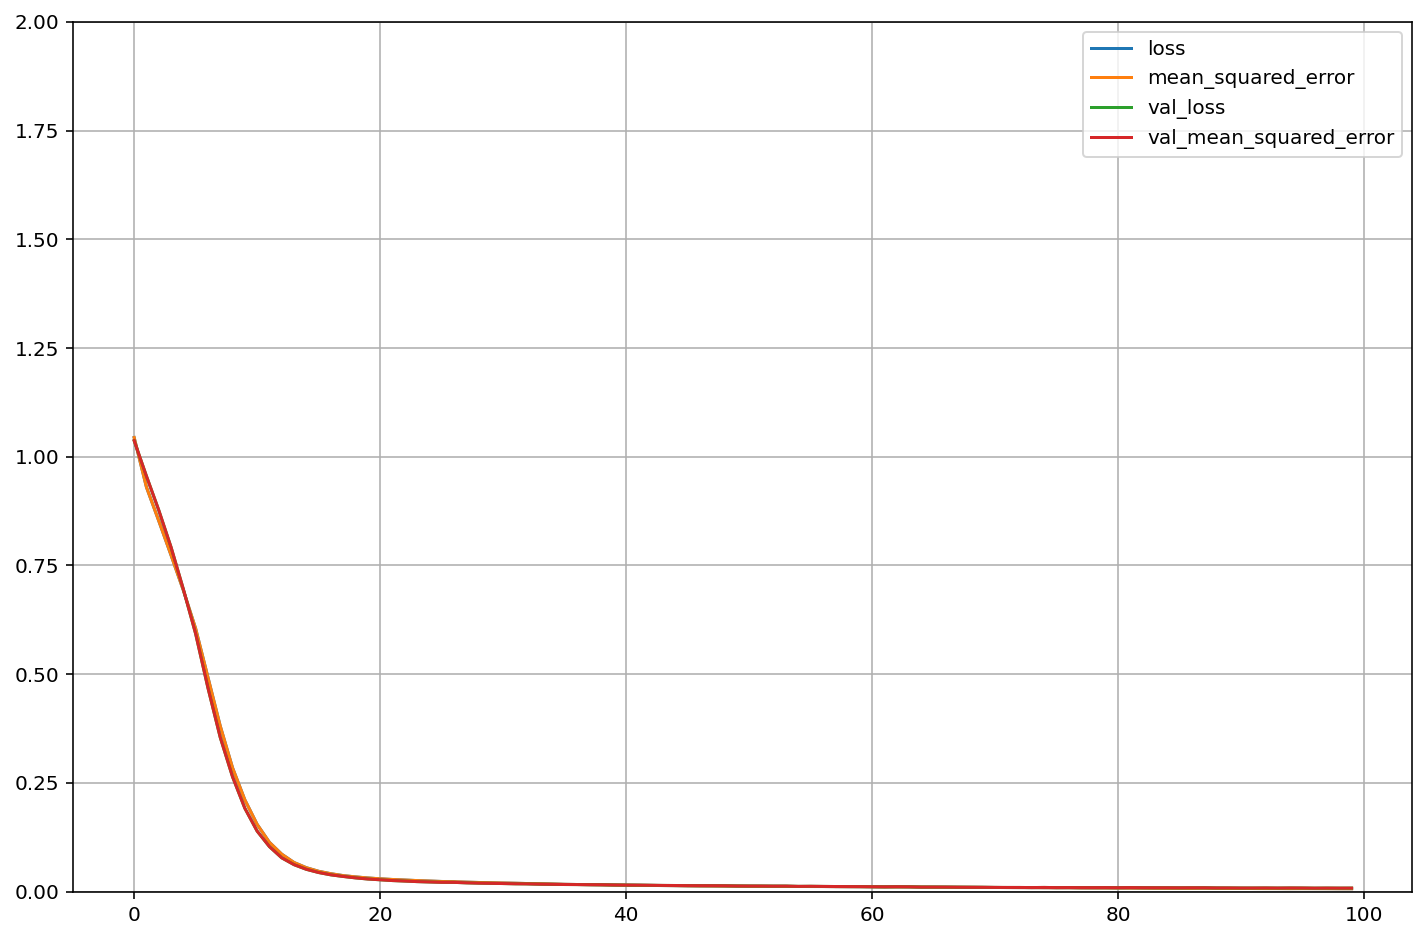

In [21]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(12,8))
plt.grid(True)
plt.gca().set_ylim(0,2)
plt.show()

# PREDICT

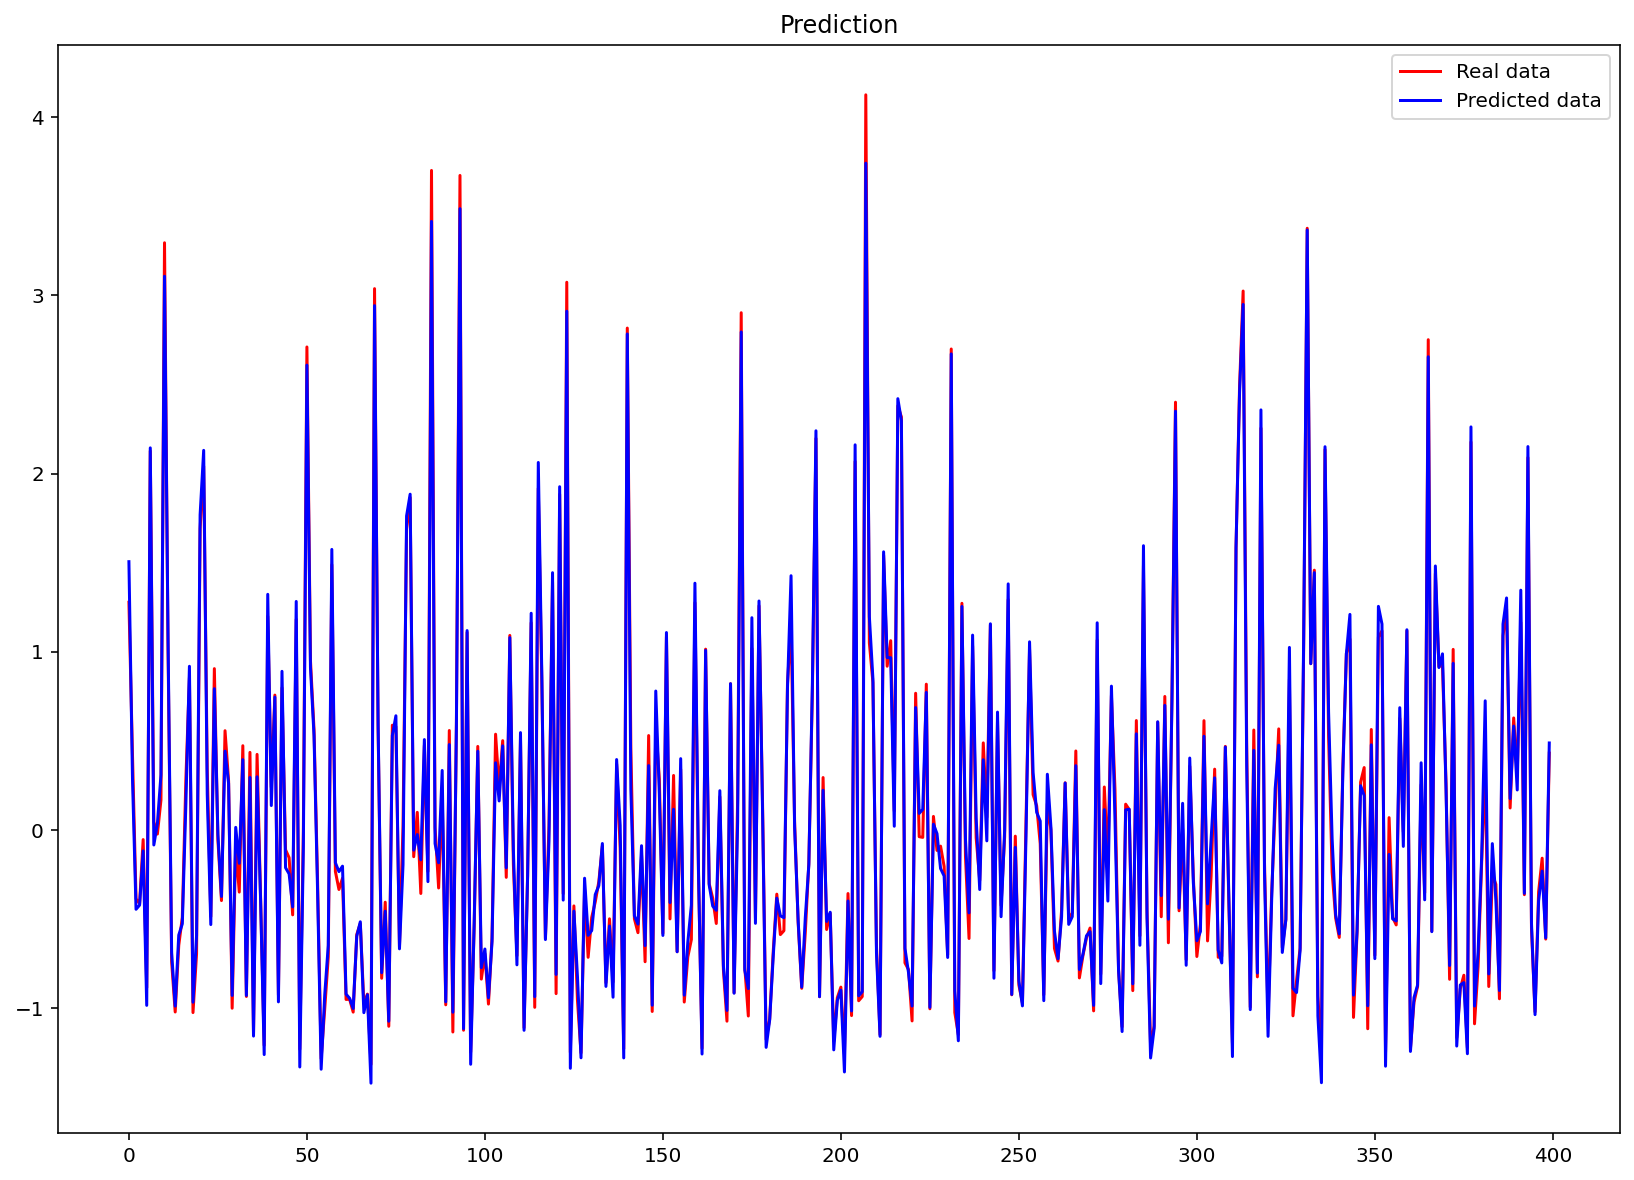

In [22]:
y_pred = model.predict(X_test)

plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction') 

plt.legend()
plt.show()

In [23]:
from math import sqrt
rmse = sqrt(mean_squared_error(y_pred, y_test))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.088


In [24]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [25]:

# Scaling the predicted  data back to original data
Predictions=TargetVarScalerFit.inverse_transform(y_pred)
 
# Scaling the y_test  data back to original data
y_test_orig=TargetVarScalerFit.inverse_transform(y_test)
 
# Scaling the test data back to original 
Test_Data=PredictorScalerFit.inverse_transform(X_test)

In [26]:
TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['orginal']=y_test_orig
TestingData['predicted']=Predictions
TestingData.head()

,fc20,fy20,cover,depth,area,orginal,predicted
0,20.08625,966.025,0.04477,0.17780,0.000498,58204.08566,63148.960938
1,69.58375,920.125,0.05473,0.22756,0.000252,39650.98206,36758.285156
2,28.82875,366.625,0.04891,0.23612,0.000325,22067.96957,20793.757812
3,26.61875,273.025,0.03337,0.27004,0.000335,21490.29655,21301.763672
4,74.62125,583.525,0.05205,0.16452,0.000453,29284.81289,27905.808594


In [27]:
mean_absolute_percentage_error(TestingData['orginal'],TestingData['predicted'])

7.858965037189475

In [28]:
from math import sqrt
rmse = sqrt(mean_squared_error(TestingData['predicted'], TestingData['orginal']))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 1901.587


In [29]:
from sklearn.metrics import r2_score
r_squared=r2_score(TestingData['orginal'], TestingData['predicted'])

In [30]:
Y_test=TestingData['orginal']
Y_pred=TestingData['predicted']

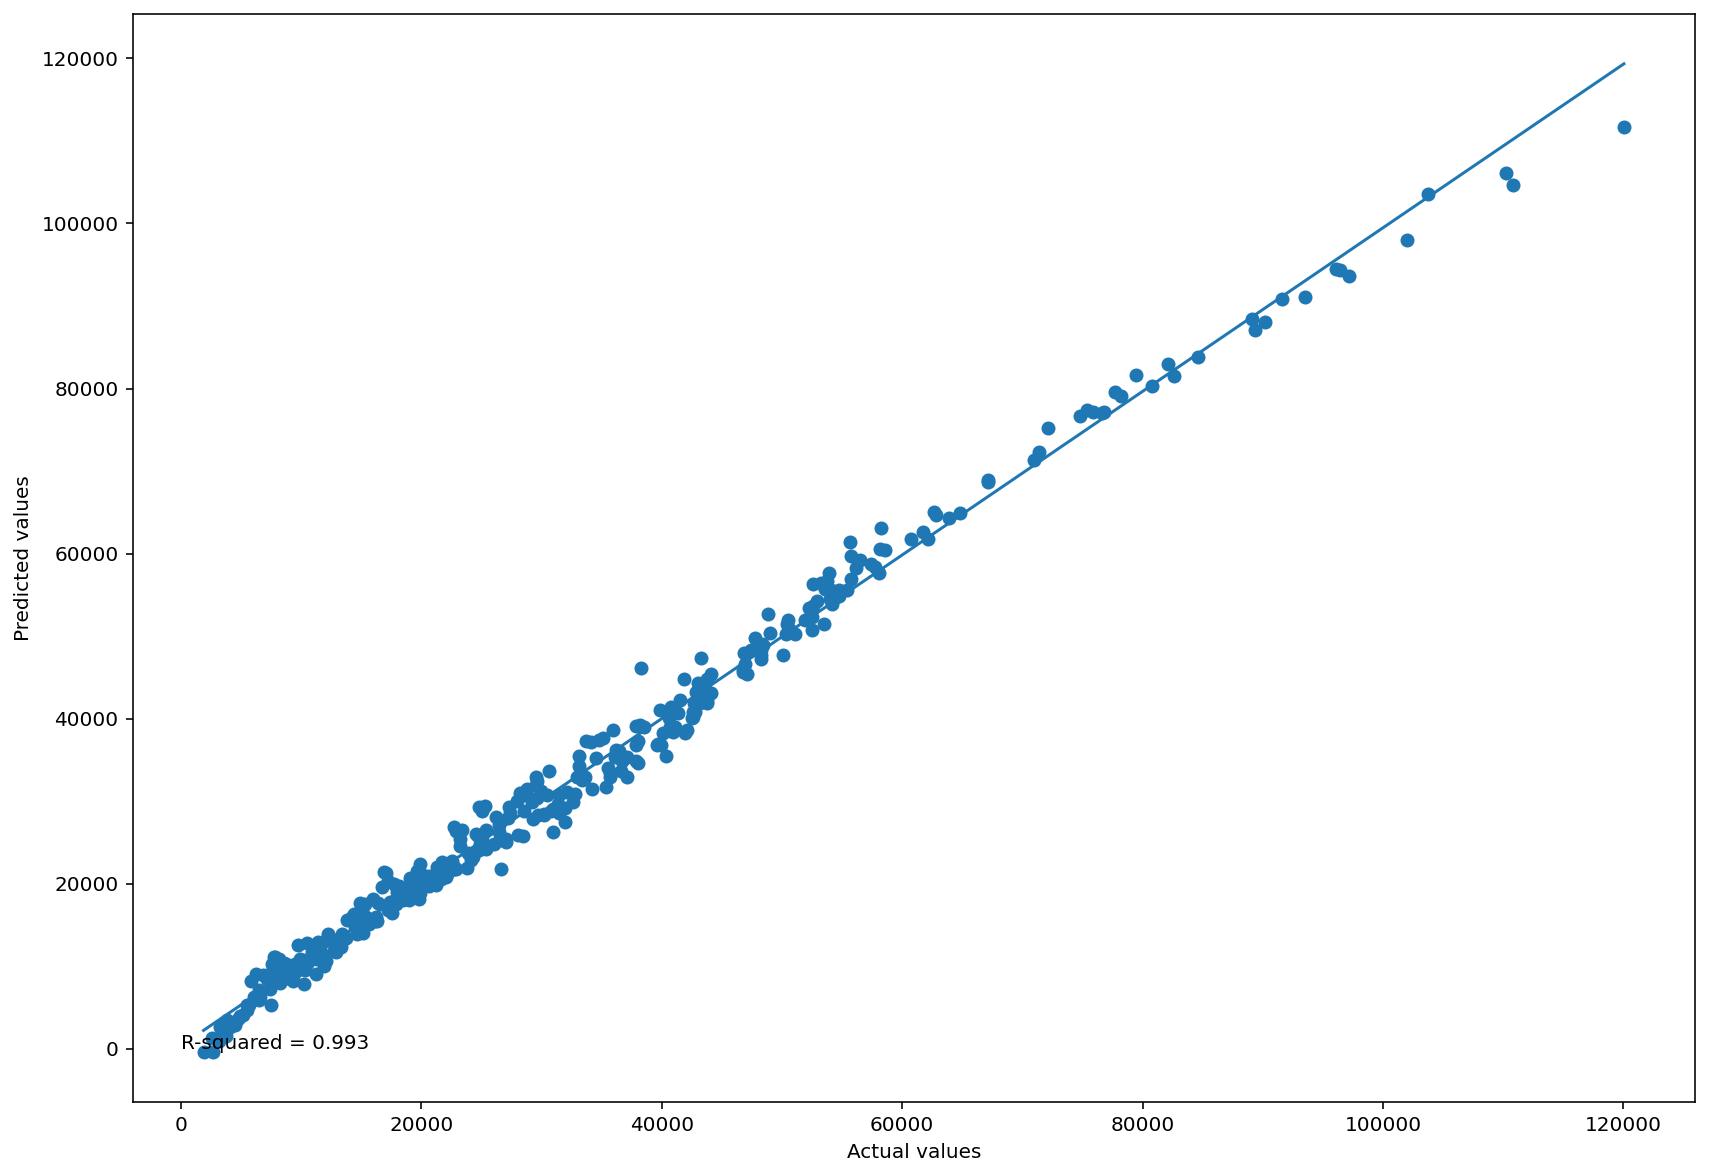

In [31]:
r_squared = r_squared
plt.scatter(Y_test,Y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.plot(np.unique(Y_test), np.poly1d(np.polyfit(Y_test, Y_pred, 1))(np.unique(Y_test)))
plt.text(0.6, 0.5, 'R-squared = %0.3f' % r_squared)
plt.title("")
plt.show()